<h1><center>IBM Capstone Project</center></h1>                              

## Objective 

#### To find the few places to stay in BOston with low crime rate and good asian restuararestaurants 

### Importing all the required libraries

In [54]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Solving environment: ...working... done

# All requested packages already installed.

Solving environment: ...working... done

# All requested packages already installed.

Folium installed
Libraries imported.


In [23]:
df = pd.read_csv('tmpugrfsb42.csv')
# Preview the first 5 lines of the loaded data 
df.head()

C:\Users\KISHORE\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (0,2,6,12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,TESTTEST2,423,NaN,ASSAULT - AGGRAVATED,External,,0,2019-10-16 00:00:00,2019,10,Wednesday,0,NaN,RIVERVIEW DR,NaN,NaN,"(0.00000000, 0.00000000)"
1,S47513131,2647,NaN,THREATS TO DO BODILY HARM,E18,530,0,2020-06-24 10:15:00,2020,6,Wednesday,10,NaN,READVILLE ST,42.239491,-71.135954,"(42.23949100, -71.13595400)"
2,I92102201,3301,NaN,VERBAL DISPUTE,E13,583,0,2019-12-20 03:08:00,2019,12,Friday,3,NaN,DAY ST,42.325122,-71.107779,"(42.32512200, -71.10777900)"
3,I92097173,3115,NaN,INVESTIGATE PERSON,C11,355,0,2019-10-23 00:00:00,2019,10,Wednesday,0,NaN,GIBSON ST,42.297555,-71.059709,"(42.29755500, -71.05970900)"
4,I92094519,3126,NaN,WARRANT ARREST - OUTSIDE OF BOSTON WARRANT,D14,765,0,2019-11-22 07:50:00,2019,11,Friday,7,NaN,BROOKS ST,42.355120,-71.162678,"(42.35512000, -71.16267800)"


## Cleaning the data

In [25]:
df_1=df[['INCIDENT_NUMBER', 'OFFENSE_CODE_GROUP','DISTRICT','Lat','Long']]

In [33]:
#df_1=df_1[df_1.OFFENSE_CODE_GROUP!='NaN']
df_1.dropna(subset=['OFFENSE_CODE_GROUP'], inplace=True)

In [34]:
df_1.dropna(subset=['Lat'], inplace=True)
df_1.dropna(subset=['Long'], inplace=True)

In [35]:
df_1.head()

,INCIDENT_NUMBER,OFFENSE_CODE_GROUP,DISTRICT,Lat,Long
32,I192082859,Auto Theft,E18,42.259518,-71.121563
33,I192082751,Auto Theft,E18,42.262092,-71.116710
34,I192082680,Auto Theft,D14,42.352375,-71.135096
35,I192082577,Auto Theft,D4,42.349476,-71.076402
36,I192079582,Auto Theft,A15,42.381846,-71.066551


In [43]:
district_code = pd.read_csv('BOSTON_DISTRICT_CODE.csv')
# Preview the first 5 lines of the loaded data 
district_code.rename(columns = {'Unnamed: 1':'Location'}, inplace = True)
district_code.head()

,DISTRICT,Location
0,Code,Location
1,E18,Hyde Park
2,E13,Jamaica Plain
3,C11,Dorchester
4,D14,"Allston,Brighton"


In [44]:
df_2 = pd.merge(df_1, district_code, how='inner', left_on = 'DISTRICT', right_on = 'DISTRICT')
df_2.head()

,INCIDENT_NUMBER,OFFENSE_CODE_GROUP,DISTRICT,Lat,Long,Location
0,I192082859,Auto Theft,E18,42.259518,-71.121563,Hyde Park
1,I192082751,Auto Theft,E18,42.262092,-71.116710,Hyde Park
2,I192078608,Simple Assault,E18,42.278688,-71.117344,Hyde Park
3,I192078586,Motor Vehicle Accident Response,E18,42.264837,-71.099668,Hyde Park
4,I192078583,Motor Vehicle Accident Response,E18,42.270801,-71.105812,Hyde Park


In [57]:
df_2.to_csv('crime_data.csv', index = False)

In [56]:
#crime_data = df_2[['', 'OFFENSE_CODE_GROUP','DISTRICT','Lat','Long']]
df_2[['Location', 'OFFENSE_CODE_GROUP']]

,Location,OFFENSE_CODE_GROUP
0,Hyde Park,Auto Theft
1,Hyde Park,Auto Theft
2,Hyde Park,Simple Assault
3,Hyde Park,Motor Vehicle Accident Response
4,Hyde Park,Motor Vehicle Accident Response
...,...,...
397810,Jamaica Plain,Warrant Arrests
397811,Jamaica Plain,Warrant Arrests
397812,Jamaica Plain,Drug Violation
397813,Jamaica Plain,Drug Violation


In [3]:
crime_data = pd.read_csv('crime_data.csv', index_col=0)
# Preview the first 5 lines of the loaded data 

In [4]:
crime_data.head()

,Auto Theft,Simple Assault,Motor Vehicle Accident Response,Violations,Larceny From Motor Vehicle,Towed,Larceny,Investigate Person,Vandalism,Medical Assistance,...,Explosives,Aircraft,Manslaughter,Gambling,Burglary - No Property Taken,HUMAN TRAFFICKING,Harbor Related Incidents,HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE,Biological Threat,Unnamed: 67
Location,,,,,,,,,,,,,,,,,,,,,
Hyde Park,285,905,2694,373,661,411,1264,1587,1007,2299,...,4,1,1,1,3,0,0,0,0,0
"Allston,Brighton",344,1101,3213,313,810,1883,2118,1591,1330,2173,...,1,0,0,0,0,4,0,0,0,0
"Back Bay,South End,Fenway",714,2646,3728,469,2248,2412,9200,2540,2162,3069,...,2,1,1,0,0,0,1,0,0,0
Beacon Hill,121,356,1079,110,369,442,647,603,475,647,...,1,0,0,0,0,0,7,0,0,0
"Mattapan,North Dorchester",711,2347,4387,993,1020,836,1672,3281,2480,3210,...,2,0,1,0,2,1,0,2,0,0


In [5]:
crime_data.describe()

,Auto Theft,Simple Assault,Motor Vehicle Accident Response,Violations,Larceny From Motor Vehicle,Towed,Larceny,Investigate Person,Vandalism,Medical Assistance,...,Explosives,Aircraft,Manslaughter,Gambling,Burglary - No Property Taken,HUMAN TRAFFICKING,Harbor Related Incidents,HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE,Biological Threat,Unnamed: 67
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,...,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.0
mean,482.333333,1674.833333,3403.583333,550.666667,1095.916667,1183.166667,2804.833333,1979.000000,1617.333333,2599.833333,...,2.500000,4.000000,0.750000,0.666667,0.416667,0.583333,11.166667,0.333333,0.250000,0.0
std,283.747113,1018.126339,1700.584683,430.770205,572.460314,650.941812,2513.356641,991.295204,875.314420,1104.383813,...,2.393172,13.232192,0.621582,1.230915,0.996205,1.164500,17.978944,0.651339,0.866025,0.0
min,121.000000,356.000000,1079.000000,110.000000,369.000000,392.000000,647.000000,603.000000,475.000000,647.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,269.750000,892.000000,2428.500000,306.750000,639.250000,663.250000,1203.500000,1263.750000,1004.500000,2058.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,377.500000,1246.000000,3087.000000,368.000000,1026.500000,1135.500000,1901.500000,1685.000000,1402.000000,2291.000000,...,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.500000,0.000000,0.000000,0.0
75%,711.750000,2673.500000,3892.750000,600.750000,1489.500000,1599.000000,3169.750000,2725.250000,2241.500000,3104.250000,...,3.250000,0.250000,1.000000,1.000000,0.000000,1.000000,13.250000,0.250000,0.000000,0.0
max,970.000000,3286.000000,6748.000000,1516.000000,2248.000000,2412.000000,9200.000000,3501.000000,3081.000000,4598.000000,...,7.000000,46.000000,2.000000,4.000000,3.000000,4.000000,46.000000,2.000000,3.000000,0.0


## Normalizing data for any type of clustering

In [6]:
from sklearn import preprocessing
crime_data_stand = preprocessing.scale(crime_data)
print(crime_data_stand)
crime_data_stand = pd.DataFrame(crime_data_stand)

[[-7.26379001e-01 -7.89749427e-01 -4.35812240e-01 -4.30779053e-01
  -7.93514646e-01 -1.23897676e+00 -6.40318172e-01 -4.13025953e-01
  -7.28278161e-01 -2.84511748e-01 -1.01783954e-01 -5.44884766e-01
   2.77660315e-01 -5.34813006e-01  2.22665704e-01 -6.51626755e-02
  -2.52652649e-01 -8.95685439e-01 -3.69359638e-01 -7.16249038e-02
  -1.40296860e+00 -4.95255852e-01 -7.26775072e-01 -2.52340079e-01
  -5.91158527e-01  2.58992824e-01 -5.80513463e-01 -7.37939817e-01
  -6.44208432e-01 -2.88680580e-01  3.78129855e-01 -7.45649064e-01
  -2.91724975e-01 -4.33446258e-01 -6.38408591e-01 -8.16691518e-01
  -6.99753104e-01 -9.33171378e-01 -4.13412807e-01  6.70414556e-01
  -4.19415449e-01 -6.33035920e-01 -6.21882653e-01 -1.09513284e-01
  -7.51578806e-01 -1.14061882e+00 -5.75072050e-01 -1.46302508e-01
  -2.86299167e-01 -7.39032369e-01 -7.18279361e-01 -1.14245559e+00
  -8.03734202e-01 -4.95761646e-01 -5.99297749e-01 -5.27067606e-01
  -5.14820640e-01  6.54653671e-01 -2.36801111e-01  4.20084025e-01
   2.82842

## K-means Clustering

### Using Elbow Method to find the moderate K value for K Mean Method

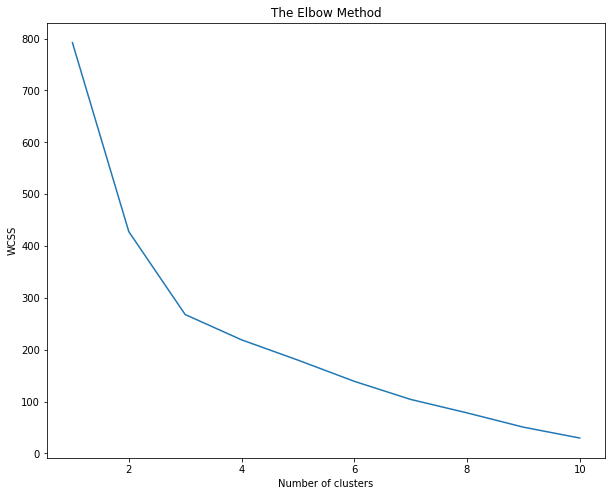

In [7]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10, 8))
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    km.fit(crime_data_stand)
    wcss.append(km.inertia_) #criterion based on which K-means clustering works
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Through elbow method, K = 3

In [8]:
km = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_km = km.fit_predict(crime_data_stand)

y_km

array([0, 0, 2, 0, 1, 2, 0, 0, 1, 1, 0, 0])

In [9]:
y_km1=y_km+1

# New list called cluster
cluster = list(y_km1)
# Adding cluster to our data set
crime_data['cluster'] = cluster

In [10]:
#Mean of clusters 1 to 3
km_mean_cluster = pd.DataFrame(round(crime_data.groupby('cluster').mean(),1))
km_mean_cluster

,Auto Theft,Simple Assault,Motor Vehicle Accident Response,Violations,Larceny From Motor Vehicle,Towed,Larceny,Investigate Person,Vandalism,Medical Assistance,...,Explosives,Aircraft,Manslaughter,Gambling,Burglary - No Property Taken,HUMAN TRAFFICKING,Harbor Related Incidents,HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE,Biological Threat,Unnamed: 67
cluster,,,,,,,,,,,,,,,,,,,,,
1,294.9,891.4,2371.6,308.3,726.4,950.4,1432.6,1297.4,1019.6,1885.0,...,1.7,6.7,0.6,0.7,0.4,0.7,13.7,0.0,0.0,0.0
2,866.3,2796.3,5820.3,1221.0,1449.7,1192.0,2784.3,3421.3,2874.7,4066.0,...,5.3,0.0,1.3,1.0,0.7,0.7,1.7,1.0,0.0,0.0
3,562.5,2734.5,3390.5,393.5,1858.5,1984.5,7638.5,2201.0,1823.5,2902.5,...,1.0,0.5,0.5,0.0,0.0,0.0,16.5,0.5,1.5,0.0


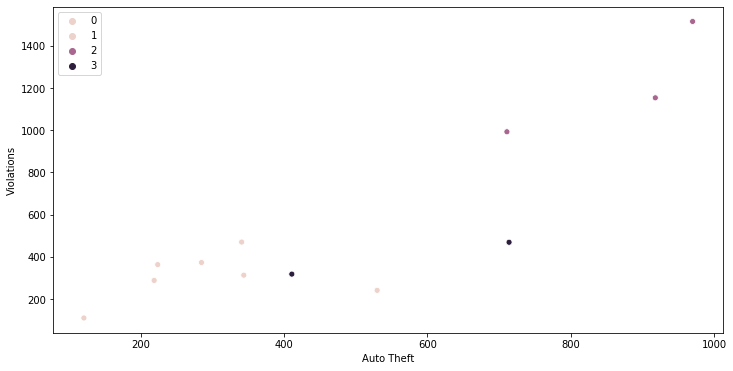

In [11]:
import seaborn as sns

plt.figure(figsize=(12,6))
sns.scatterplot(x=crime_data['Auto Theft'], y = crime_data['Violations'],hue=y_km1)

In [12]:
km_mean_cluster.corr(method ='pearson') 

,Auto Theft,Simple Assault,Motor Vehicle Accident Response,Violations,Larceny From Motor Vehicle,Towed,Larceny,Investigate Person,Vandalism,Medical Assistance,...,Explosives,Aircraft,Manslaughter,Gambling,Burglary - No Property Taken,HUMAN TRAFFICKING,Harbor Related Incidents,HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE,Biological Threat,Unnamed: 67
Auto Theft,1.000000,0.861993,0.980972,0.920108,0.602055,0.187530,0.171194,0.998784,0.999190,0.999998,...,0.802500,-0.880857,0.824205,0.327067,0.459886,0.036553,-0.786261,0.999332,-0.036553,NaN
Simple Assault,0.861993,1.000000,0.747174,0.594585,0.923720,0.659576,0.647004,0.835955,0.840895,0.860943,...,0.389295,-0.999260,0.423395,-0.197110,-0.053715,-0.475073,-0.364529,0.879946,0.475073,NaN
Motor Vehicle Accident Response,0.980972,0.747174,1.000000,0.978641,0.435582,-0.006741,-0.023345,0.989351,0.987991,0.981372,...,0.903069,-0.772191,0.918467,0.504313,0.623534,0.229875,-0.891263,0.973220,-0.229875,NaN
Violations,0.920108,0.594585,0.978641,1.000000,0.241230,-0.212167,-0.228366,0.938298,0.935124,0.920917,...,0.972074,-0.625077,0.980154,0.671060,0.770934,0.425035,-0.965453,0.905177,-0.425035,NaN
Larceny From Motor Vehicle,0.602055,0.923720,0.435582,0.241230,1.000000,0.897192,0.889735,0.561961,0.569436,0.600402,...,0.006750,-0.908299,0.044060,-0.557628,-0.432133,-0.775914,0.019987,0.630839,0.775914,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HUMAN TRAFFICKING,0.036553,-0.475073,0.229875,0.425035,-0.775914,-0.974748,-0.978321,0.085773,0.076739,0.038620,...,0.625587,0.440868,0.596040,0.956325,0.904194,1.000000,-0.646221,0.000000,-1.000000,NaN
Harbor Related Incidents,-0.786261,-0.364529,-0.891263,-0.965453,0.019987,0.459484,0.474169,-0.815766,-0.810490,-0.787538,...,-0.999643,0.400084,-0.997949,-0.841071,-0.910267,-0.646221,1.000000,-0.763150,0.646221,NaN
HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE,0.999332,0.879946,0.973220,0.905177,0.630839,0.223309,0.207092,0.996315,0.997051,0.999254,...,0.780155,-0.897572,0.802955,0.292306,0.427121,0.000000,-0.763150,1.000000,0.000000,NaN
Biological Threat,-0.036553,0.475073,-0.229875,-0.425035,0.775914,0.974748,0.978321,-0.085773,-0.076739,-0.038620,...,-0.625587,-0.440868,-0.596040,-0.956325,-0.904194,-1.000000,0.646221,0.000000,1.000000,NaN


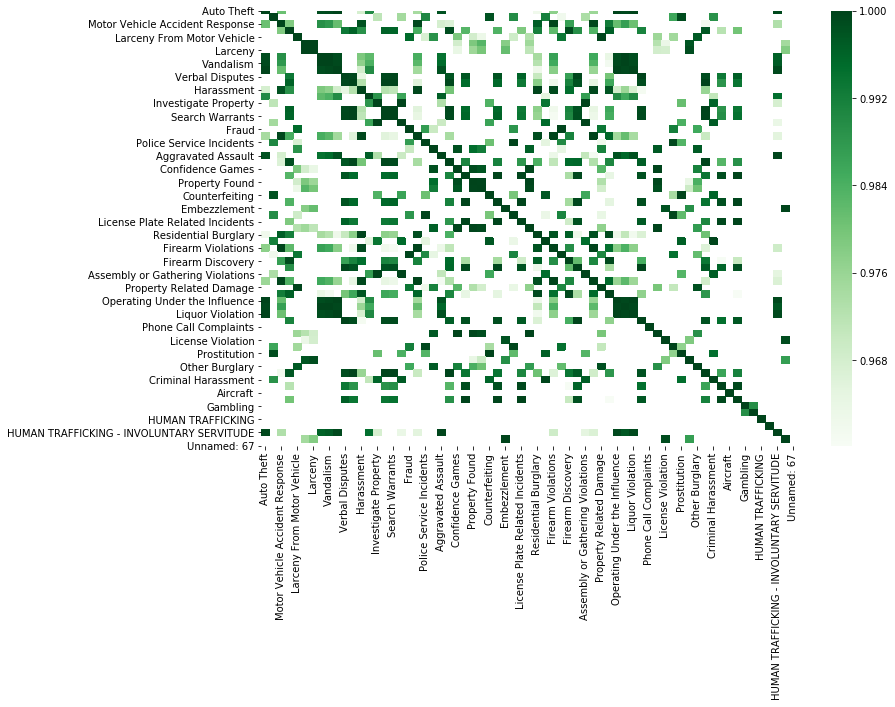

In [13]:
corr = km_mean_cluster.corr(method ='pearson')

kot = corr[corr>=.96]
plt.figure(figsize=(12,8))
sns.heatmap(kot, cmap="Greens")

From the above heat map, we can see that few high correlation between pairs. Lets check one such pair, Vandalism and Operating Under the Influence.

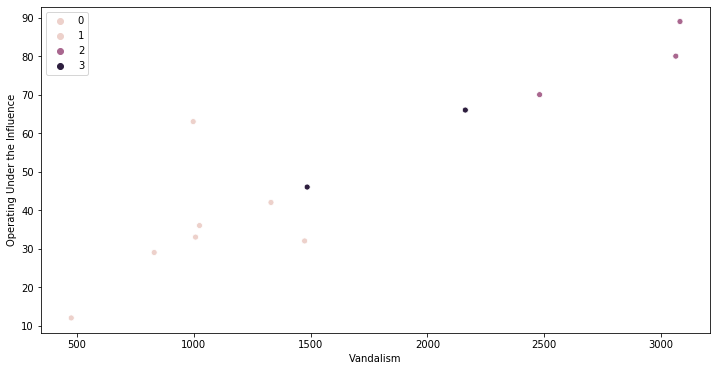

In [14]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=crime_data['Vandalism'], y = crime_data['Operating Under the Influence'],hue=y_km1)

Here we can see a clear correlation between the two. One needs to be resduced to porevent the other.

## Cluster 1

In [15]:
cluster_1 = crime_data[crime_data['cluster']==1]
cluster_1

,Auto Theft,Simple Assault,Motor Vehicle Accident Response,Violations,Larceny From Motor Vehicle,Towed,Larceny,Investigate Person,Vandalism,Medical Assistance,...,Aircraft,Manslaughter,Gambling,Burglary - No Property Taken,HUMAN TRAFFICKING,Harbor Related Incidents,HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE,Biological Threat,Unnamed: 67,cluster
Location,,,,,,,,,,,,,,,,,,,,,
Hyde Park,285,905,2694,373,661,411,1264,1587,1007,2299,...,1,1,1,3,0,0,0,0,0,1
"Allston,Brighton",344,1101,3213,313,810,1883,2118,1591,1330,2173,...,0,0,0,0,4,0,0,0,0,1
Beacon Hill,121,356,1079,110,369,442,647,603,475,647,...,0,0,0,0,0,7,0,0,0,1
East Boston,224,853,1780,363,479,737,881,1055,997,1703,...,46,1,0,0,0,43,0,0,0,1
"West Roxbury,Roslindale",219,684,2214,288,574,392,1022,1294,830,2071,...,0,1,0,0,1,0,0,0,0,1
South Boston,530,1391,3121,241,1159,1725,2411,1779,1474,2283,...,0,0,0,0,0,46,0,0,0,1
Jamaica Plain,341,950,2500,470,1033,1063,1685,1173,1024,2019,...,0,1,4,0,0,0,0,0,0,1


## Cluster 2

In [16]:
crime_data[crime_data['cluster']==2]

,Auto Theft,Simple Assault,Motor Vehicle Accident Response,Violations,Larceny From Motor Vehicle,Towed,Larceny,Investigate Person,Vandalism,Medical Assistance,...,Aircraft,Manslaughter,Gambling,Burglary - No Property Taken,HUMAN TRAFFICKING,Harbor Related Incidents,HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE,Biological Threat,Unnamed: 67,cluster
Location,,,,,,,,,,,,,,,,,,,,,
"Mattapan,North Dorchester",711,2347,4387,993,1020,836,1672,3281,2480,3210,...,0,1,0,2,1,0,2,0,0,2
"Roxbury,Mission Hill",970,3286,6748,1516,1778,1208,3682,3501,3063,4598,...,0,1,1,0,0,2,1,0,0,2
Dorchester,918,2756,6326,1154,1551,1532,2999,3482,3081,4390,...,0,2,2,0,1,3,0,0,0,2


## Cluster 3

In [17]:
crime_data[crime_data['cluster']==3]

,Auto Theft,Simple Assault,Motor Vehicle Accident Response,Violations,Larceny From Motor Vehicle,Towed,Larceny,Investigate Person,Vandalism,Medical Assistance,...,Aircraft,Manslaughter,Gambling,Burglary - No Property Taken,HUMAN TRAFFICKING,Harbor Related Incidents,HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE,Biological Threat,Unnamed: 67,cluster
Location,,,,,,,,,,,,,,,,,,,,,
"Back Bay,South End,Fenway",714,2646,3728,469,2248,2412,9200,2540,2162,3069,...,1,1,0,0,0,1,0,0,0,3
Downtown,411,2823,3053,318,1469,1557,6077,1862,1485,2736,...,0,0,0,0,0,32,1,3,0,3


We can see that the low number of crimes are commited in cluster 1.

## Foursquare API

#### Connecting to foursquare API to find suitable restaurants 

In [18]:
CLIENT_ID = 'KYNJRIGG4ZGMMO2AXTMR5TQRNLFC2D1M15TSHADI2NNW2VT4' # your Foursquare ID
CLIENT_SECRET = 'OGNFWCTEILVS4MTPMONHL3TVZPJNCNCNYYJ4QKKKLS5BDFAK' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: KYNJRIGG4ZGMMO2AXTMR5TQRNLFC2D1M15TSHADI2NNW2VT4
CLIENT_SECRET:OGNFWCTEILVS4MTPMONHL3TVZPJNCNCNYYJ4QKKKLS5BDFAK


In [109]:
Hyde Park

SyntaxError: invalid syntax (<ipython-input-109-e2a064880929>, line 1)

In [110]:
address = 'Hyde Park, Boston'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

42.2556543 -71.1244963


In [174]:
LIMIT = 100 # limit of number of venues returned by Foursquare API


search_query = 'Indian'
radius = 500 # define radius

# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION,
    latitude, 
    longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=KYNJRIGG4ZGMMO2AXTMR5TQRNLFC2D1M15TSHADI2NNW2VT4&client_secret=OGNFWCTEILVS4MTPMONHL3TVZPJNCNCNYYJ4QKKKLS5BDFAK&v=20180604&ll=Indian,42.3554344&radius=-71.1321271&limit=500'

In [175]:
results = requests.get(url).json()
results

{'meta': {'code': 400,
  'errorType': 'param_error',
  'errorDetail': 'll must be of the form XX.XX,YY.YY (received Indian,42.3554344)',
  'requestId': '5f0300333ff7134271aa9bfb'},
 'response': {}}

In [165]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [166]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Lulu's Allston,Comfort Food Restaurant,42.355068,-71.134107
1,Azama Grill,Falafel Restaurant,42.354422,-71.132358
2,Kaju Tofu House,Korean Restaurant,42.354329,-71.132374
3,Allston Diner,Diner,42.354979,-71.134295
4,Fish Market Sushi Bar,Sushi Restaurant,42.353039,-71.132975


### Getting Restaurants near Allston, Boston

In [19]:
address = 'Allston, Boston'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

42.3554344 -71.1321271


In [28]:
LIMIT = 100 # limit of number of venues returned by Foursquare API


search_query = 'Indian'
radius = 500 # define radius

# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION,
    latitude, 
    longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=KYNJRIGG4ZGMMO2AXTMR5TQRNLFC2D1M15TSHADI2NNW2VT4&client_secret=OGNFWCTEILVS4MTPMONHL3TVZPJNCNCNYYJ4QKKKLS5BDFAK&v=20180604&ll=42.3554344,-71.1321271&radius=500&limit=100'

In [29]:
results_1 = requests.get(url).json()
results_1

{'meta': {'code': 200, 'requestId': '5f041b8a4cfdf626a83a85e6'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': '$-$$$$', 'key': 'price'}]},
  'headerLocation': 'Allston',
  'headerFullLocation': 'Allston, Boston',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 81,
  'suggestedBounds': {'ne': {'lat': 42.3599344045, 'lng': -71.12604898570221},
   'sw': {'lat': 42.3509343955, 'lng': -71.1382052142978}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '530647fd498e4ac184afea7c',
       'name': "Lulu's Allston",
       'location': {'address': '421 Cambridge St',
        'lat': 42.35506753787248,
        'lng': -71.1341073754865,
        'labeledLatLngs': [{'label': 'display',
          'lat': 42.35506753787248,
         

In [30]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [43]:
venues = results_1['response']['groups'][0]['items']
    
nearby_venues_1 = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues_1 =nearby_venues_1.loc[:, filtered_columns]

# filter the category for each row
nearby_venues_1['venue.categories'] = nearby_venues_1.apply(get_category_type, axis=1)

# clean columns
nearby_venues_1.columns = [col.split(".")[-1] for col in nearby_venues_1.columns]

raw_data = nearby_venues_1
raw_data.head()

,name,categories,lat,lng
0,Lulu's Allston,Comfort Food Restaurant,42.355068,-71.134107
1,Azama Grill,Falafel Restaurant,42.354422,-71.132358
2,Kaju Tofu House,Korean Restaurant,42.354329,-71.132374
3,Allston Diner,Diner,42.354979,-71.134295
4,Fish Market Sushi Bar,Sushi Restaurant,42.353039,-71.132975


## Searching for specific categories - Indian Restaurants

In [37]:
nearby_venues_1[nearby_venues_1['categories'].str.contains("Indian Restaurant")]

,name,categories,lat,lng
14,Punjab Palace,Indian Restaurant,42.352839,-71.13052


## Grouping Restaurants based on cuisine

In [45]:
# we can group some cuisines together to make a better categorical variable

euro = ['French Restaurant', 'Scandinavian Restaurant', 'Souvlaki Shop', 
       'Mediterranean Restaurant', 'Italian Restaurant', 'Pizza Place']

latino = ['Mexican Restaurant', 'Latin American Restaurant', 
          'Brazilian Restaurant', 'Taco Place']

bar = ['Beer Bar', 'Cocktail Bar', 'Tiki Bar', 'Wine Bar', 'Hotel Bar',
       'Beer Garden', 'Speakeasy', 'Brewery', 'Pub', 'Bar', 'Gastropub',
       'Hookah Bar']

asian = ['Ramen Restaurant', 'Sushi Restaurant', 'Vietnamese Restaurant',
         'Thai Restaurant', 'Poke Place', 'Indian Restaurant', 
         'Japanese Curry Restaurant', 'Japanese Restaurant', 
         'Indonesian Restaurant', 'Udon Restaurant', 'Noodle House',
         'Falafel Restaurant', 'Filipino Restaurant', 'Turkish Restaurant',
         'Yoshoku Restaurant']

casual = ['Coffee Shop', 'Café', 'Sandwich Place', 'Food Truck',
          'Juice Bar', 'Frozen Yogurt Shop', 'Deli / Bodega', 'Dessert Shop',
          'Hot Dog Joint', 'Burger Joint', 'Breakfast Spot', 
          'Fondue Restaurant']

american = ['Southern / Soul Food Restaurant', 'Food & Drink Shop', 
            'Restaurant', 'American Restaurant', 'BBQ Joint', 
            'Theme Restaurant', 'New American Restaurant',
            'Vegetarian / Vegan Restaurant', 'Seafood Restaurant']

def conditions(s):
    if s['categories'] in euro:
        return 'euro'
    if s['categories'] in latino:
        return 'latino'
    if s['categories'] in asian:
        return 'asian'
    if s['categories'] in casual:
        return 'casual'
    if s['categories'] in american:
        return 'american'
    if s['categories'] in bar:
        return 'bar'

raw_data['categories_classified']=raw_data.apply(conditions, axis=1)
raw_data

,name,categories,lat,lng,categories_classified
0,Lulu's Allston,Comfort Food Restaurant,42.355068,-71.134107,None
1,Azama Grill,Falafel Restaurant,42.354422,-71.132358,asian
2,Kaju Tofu House,Korean Restaurant,42.354329,-71.132374,None
3,Allston Diner,Diner,42.354979,-71.134295,None
4,Fish Market Sushi Bar,Sushi Restaurant,42.353039,-71.132975,asian
...,...,...,...,...,...
76,Banya Inc.,Spa,42.355125,-71.130318,None
77,Quint Ave.,Scenic Lookout,42.352392,-71.134214,None
78,Sabor do Brasil,Brazilian Restaurant,42.353109,-71.133076,latino
79,Boston Babydolls,Gym / Fitness Center,42.356451,-71.136786,None


## Getting all Asian Restaurants

In [47]:
asian_restaurants = raw_data[raw_data["categories_classified"] == 'asian'] 
asian_restaurants

,name,categories,lat,lng,categories_classified
1,Azama Grill,Falafel Restaurant,42.354422,-71.132358,asian
4,Fish Market Sushi Bar,Sushi Restaurant,42.353039,-71.132975,asian
12,Thai Place,Thai Restaurant,42.353185,-71.133784,asian
14,Punjab Palace,Indian Restaurant,42.352839,-71.130520,asian
17,Shabu Zen,Japanese Restaurant,42.352678,-71.129113,asian
30,Le's Vietnamese Restaurant,Vietnamese Restaurant,42.353022,-71.131408,asian
40,A@time,Thai Restaurant,42.354939,-71.134358,asian
49,S & I Thai,Thai Restaurant,42.353013,-71.132889,asian
